In [1]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [2]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

In [3]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_training = X[250:, :]
X_testing = X[:250, :]
Targets_training = targets[250:]
Targets_testing = targets[:250]

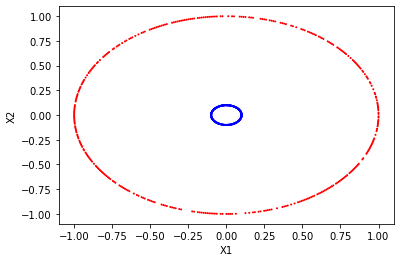

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_training[:,0], X_training[:,1], Targets_training == 0, color='red')
plt.scatter(X_training[:,0], X_training[:,1], Targets_training == 1, color='blue')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5)

Train on 750 samples
Epoch 1/30
750/750 [==============================] - 0s 457us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 2/30
750/750 [==============================] - 0s 181us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 3/30
750/750 [==============================] - 0s 159us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 4/30
750/750 [==============================] - 0s 161us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 5/30
750/750 [==============================] - 0s 152us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 6/30
750/750 [==============================] - 0s 159us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 7/30
750/750 [==============================] - 0s 152us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 8/30
750/750 [==============================] - 0s 155us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 9/30
750/750 [==============================] - 0s 154us/sample - loss: 7.6043 - accuracy: 0.5013
Epoch 10/30
750/750 [======================

In [7]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(test_results)

250/250 [==============================] - 0s 239us/sample - loss: 7.6856 - accuracy: 0.4960
[7.68561633682251, 0.496]


In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
y_train_full.shape

(60000,)

In [12]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

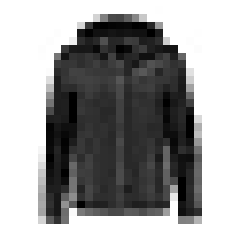

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
# 두 개의 은닉층이 있는 분류용 다층 퍼셉트론 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
# 혹은 아래와 같이 표현할 수도 있다.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [22]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.07146296,  0.01100151,  0.02883052, ..., -0.0527301 ,
        -0.00918613,  0.06356108],
       [-0.03376814, -0.00288071, -0.06402626, ...,  0.0725659 ,
        -0.0547841 ,  0.02675252],
       [-0.07019319, -0.07203793, -0.02580024, ...,  0.00720804,
         0.0727006 , -0.046088  ],
       ...,
       [ 0.01730656, -0.06784911,  0.02110595, ...,  0.02665871,
         0.06151308, -0.03810609],
       [-0.00930218, -0.01779923, -0.04046473, ..., -0.02802868,
        -0.05858721,  0.01150858],
       [-0.04339277, -0.00556736,  0.06916656, ..., -0.02809905,
         0.05021138, -0.00643164]], dtype=float32)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
# 신경망 훈련
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.7102 - accuracy: 0.7672 - val_loss: 0.5010 - val_accuracy: 0.8328
Epoch 2/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4887 - accuracy: 0.8292 - val_loss: 0.4441 - val_accuracy: 0.8530
Epoch 3/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4431 - accuracy: 0.8439 - val_loss: 0.4469 - val_accuracy: 0.8492
Epoch 4/30
55000/55000 [==============================] - 3s 53us/sample - loss: 0.4156 - accuracy: 0.8532 - val_loss: 0.4079 - val_accuracy: 0.8598
Epoch 5/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3933 - accuracy: 0.8618 - val_loss: 0.3769 - val_accuracy: 0.8704
Epoch 6/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3791 - accuracy: 0.8665 - val_loss: 0.3893 - val_accuracy: 0.8670
Epoch 7/30
55000/55000 [==============================] -

In [25]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [26]:
history

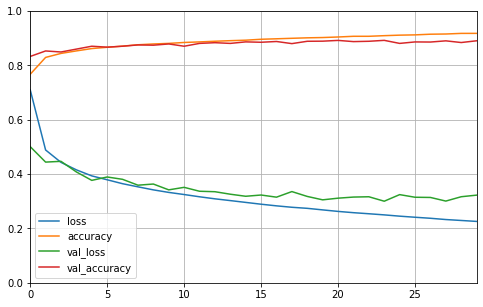

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3501 - accuracy: 0.8765


[0.3501100156903267, 0.8765]

In [29]:
X_new = X_test[:3]
X_new[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.2627451 , 0.69411765, 0.50588235, 0.6       , 0.45882353,
        0.50588235, 0.57254902, 0.55294118, 0.68627451, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.76862745, 1.        , 1.        , 1.        , 0.94509804,
        0.98431373, 1.        , 0.96078431, 1.        , 0.29803922,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.95294118, 0.92941176, 0.85098039, 0.89411765, 0.90588235,
        0.87058824, 0.8549

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

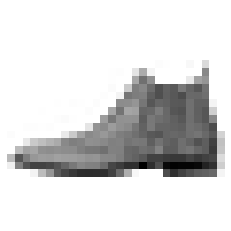

In [31]:
plt.imshow(X_new[0], cmap="binary")
plt.axis('off')
plt.show()

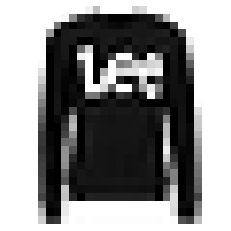

In [32]:
plt.imshow(X_new[1], cmap="binary")
plt.axis('off')
plt.show()

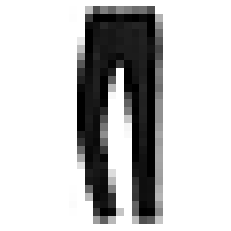

In [33]:
plt.imshow(X_new[2], cmap="binary")
plt.axis('off')
plt.show()

In [34]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
import numpy as np

In [36]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

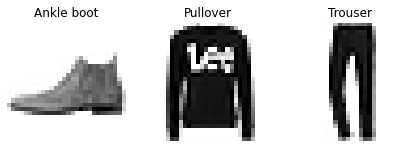

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [41]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

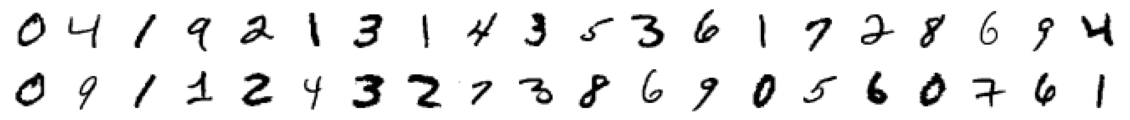

In [42]:
columns = 20
rows = 2
fig = plt.figure(figsize=(columns, rows))
for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], cmap="binary")
    plt.axis('off')
plt.show()

In [43]:
for i in range(1, columns * rows + 1): print(y_train[i], end=", ")

0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 

In [44]:
y_train[0]

5

In [45]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255 

# to_categorical은 벡터를 bianry matrix로 변환함
y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10)

In [46]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
from tensorflow.keras.models import Sequential
model = Sequential() 
model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (784,))) 
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [48]:
model.compile(loss = 'categorical_crossentropy',     
   optimizer = 'RMSprop', 
   metrics = ['accuracy'])

In [49]:
history = model.fit(
   x_train, y_train, 
   batch_size = 128, 
   epochs = 20, 
   verbose = 1, 
   validation_data = (x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2481 - accuracy: 0.9230 - val_loss: 0.0999 - val_accuracy: 0.9686
Epoch 2/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1017 - accuracy: 0.9689 - val_loss: 0.0967 - val_accuracy: 0.9702
Epoch 3/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.0777 - val_accuracy: 0.9784
Epoch 4/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0609 - accuracy: 0.9821 - val_loss: 0.0921 - val_accuracy: 0.9743
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0782 - val_accuracy: 0.9806
Epoch 6/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0421 - accuracy: 0.9874 - val_loss: 0.0723 - val_accuracy: 0.9806
Epoch 7/20
60000/60000 [==============================] 

In [50]:
import numpy as np
for i in range(50): print(np.argmax(y_test[i]), end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 

In [51]:
for result in model.predict(x_test[:50]) : print(np.argmax(result), end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 

prediction :  8
actual :  3


prediction :  9
actual :  4


prediction :  3
actual :  2


prediction :  5
actual :  6


prediction :  2
actual :  4




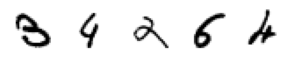

In [52]:
columns = 5
rows = 1
fig = plt.figure(figsize=(columns, rows))
    
count = 1
for i, result in enumerate(model.predict(x_test)):
    if np.argmax(y_test[i]) != np.argmax(result):
        fig.add_subplot(rows, columns, count)
        plt.imshow((x_test[i] * 255).reshape(28, 28), cmap="binary")
        plt.axis('off')
        print("prediction : ", np.argmax(result))
        print("actual : ", np.argmax(y_test[i]))
        print("\n")
        count += 1
        if count == columns + 1 : break
            
plt.show()

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [54]:
raw_wine = datasets.load_wine()

In [55]:
X = raw_wine.data
y = raw_wine.target

In [56]:
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(13, input_shape=(X_tn.shape[1], ))) # feature 13개
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 303       
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


In [59]:
keras.utils.plot_model(model,  show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [60]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [61]:
num_epo = 50
history = model.fit(X_tn, y_tn, epochs=num_epo, batch_size=5,
                    validation_data=(X_te, y_te))

Train on 133 samples, validate on 45 samples
Epoch 1/50
133/133 [==============================] - 0s 2ms/sample - loss: 12.2759 - accuracy: 0.3684 - val_loss: 2.4206 - val_accuracy: 0.5111
Epoch 2/50
133/133 [==============================] - 0s 337us/sample - loss: 1.3209 - accuracy: 0.6241 - val_loss: 2.5885 - val_accuracy: 0.4222
Epoch 3/50
133/133 [==============================] - 0s 303us/sample - loss: 1.9215 - accuracy: 0.5789 - val_loss: 10.8538 - val_accuracy: 0.3778
Epoch 4/50
133/133 [==============================] - 0s 281us/sample - loss: 4.3829 - accuracy: 0.6241 - val_loss: 5.5285 - val_accuracy: 0.4444
Epoch 5/50
133/133 [==============================] - 0s 330us/sample - loss: 2.6591 - accuracy: 0.6541 - val_loss: 3.0114 - val_accuracy: 0.4000
Epoch 6/50
133/133 [==============================] - 0s 317us/sample - loss: 0.9493 - accuracy: 0.7368 - val_loss: 1.5293 - val_accuracy: 0.5333
Epoch 7/50
133/133 [==============================] - 0s 299us/sample - loss: 0

In [62]:
print(model.evaluate(X_tn, y_tn)[1])

133/133 [==============================] - 0s 459us/sample - loss: 1.0488 - accuracy: 0.7970
0.7969925


In [63]:
print(model.evaluate(X_te, y_te)[1])

45/45 [==============================] - 0s 89us/sample - loss: 2.5343 - accuracy: 0.6222
0.62222224


In [64]:
print(history.history["accuracy"])

[0.36842105, 0.62406015, 0.57894737, 0.62406015, 0.65413535, 0.7368421, 0.7819549, 0.7067669, 0.7067669, 0.7443609, 0.7593985, 0.71428573, 0.7593985, 0.81954885, 0.7518797, 0.7218045, 0.60902256, 0.68421054, 0.6766917, 0.6466165, 0.66917294, 0.7218045, 0.7518797, 0.66917294, 0.7969925, 0.8120301, 0.8120301, 0.85714287, 0.7669173, 0.7819549, 0.7669173, 0.7894737, 0.7669173, 0.69924814, 0.62406015, 0.6165413, 0.7969925, 0.87218046, 0.81954885, 0.7368421, 0.8120301, 0.7518797, 0.7969925, 0.7744361, 0.8270677, 0.924812, 0.84962404, 0.7518797, 0.83458644, 0.8270677]


In [65]:
print(history.history["loss"])

[12.275910931870452, 1.3208530107723142, 1.9215318432245823, 4.382875899815778, 2.659132369902489, 0.9493264117159117, 0.9369052038913158, 0.977939450462993, 1.1318328739949186, 0.8950370425232371, 0.8226660268448637, 1.449819964580798, 1.1354622411632673, 0.663285144695774, 0.9757633112912343, 1.2310271678856552, 2.571164674179443, 2.9973270679614856, 1.2944316577474426, 2.875810385702696, 1.950714324839077, 1.7446998014373887, 1.370482608703091, 2.2615858993438183, 1.1229019033505068, 0.7791521708387794, 0.595671661261161, 0.6471275038092881, 1.4563043668592188, 0.8226320108790931, 1.3856757309592391, 1.0039598837886985, 0.9996606721468375, 1.6232892599681574, 2.293702790629284, 4.161322211071847, 1.285432116296619, 0.8565227259300593, 1.2126927977932014, 1.5240080637300037, 0.7914701994811278, 1.0777212721039628, 0.6904066998365322, 1.020123779706642, 0.506626587468322, 0.5034065414885325, 0.8121340878174773, 1.3577315068107425, 0.6644535364078303, 0.8012315427352276]


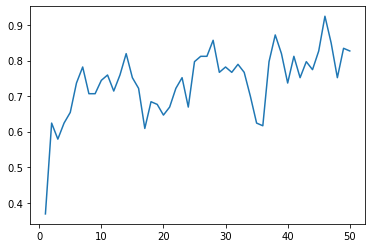

In [66]:
plt.plot(range(1, num_epo+1), history.history["accuracy"])

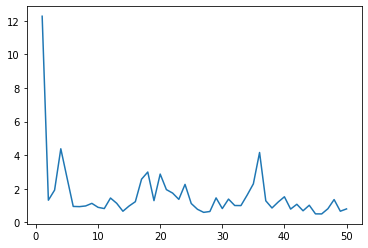

In [67]:
plt.plot(range(1, num_epo+1), history.history["loss"])

In [68]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

c:\users\minse\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\minse\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [69]:
train_labels[3]

1

In [70]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [71]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [72]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [73]:
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있음.
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [74]:
len(train_data[3])

550

In [75]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [76]:
train_data[3]

array([1784,   86, 1117,    8, 3261,   46,   11,    2,   21,   29,    9,
       2841,   23,    4, 1010,    2,  793,    6,    2, 1386, 1830,   10,
         10,  246,   50,    9,    6, 2750, 1944,  746,   90,   29,    2,
          8,  124,    4,  882,    4,  882,  496,   27,    2, 2213,  537,
        121,  127, 1219,  130,    5,   29,  494,    8,  124,    4,  882,
        496,    4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,
          8,   97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,
          7,    2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,
          9,   12,   32,   11,  537,   10,   10,   11,   14,   65,   44,
        537,   75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,
          5,    4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,
         38,   75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,
          7,   27,  205,  113,   10,   10,    2,    4,    2,    2,    9,
        242,    4,   91, 1202,    2,    5, 2070,  3

In [77]:
decode_review(train_data[3])

"twenty first century to hang out in <UNK> but he is raised on the western <UNK> among a <UNK> speaking community br br yet there is a deeper conflict within him he <UNK> to know the truth the truth behind his <UNK> ancient stories where does fiction end and he wants to know the truth behind the death of his parents br br he is pulled to make a last <UNK> journey to the <UNK> of one of <UNK> most <UNK> mountains can the truth be told or is it all in stories br br in this story about stories we <UNK> bloody battles <UNK> lovers the <UNK> of old and the sometimes more <UNK> <UNK> of accepted truth in doing so we each connect with <UNK> as he lives the story of his own life br br <UNK> the <UNK> <UNK> is probably the most honest <UNK> and genuinely beautiful film of scotland ever made like <UNK> i got slightly annoyed with the <UNK> of hanging stories on more stories but also like <UNK> i <UNK> this once i saw the <UNK> picture ' forget the box office <UNK> of braveheart and its like you 

In [78]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [80]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [81]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 58us/sample - loss: 0.6919 - accuracy: 0.6289 - val_loss: 0.6901 - val_accuracy: 0.6885
Epoch 2/40
15000/15000 [==============================] - 1s 35us/sample - loss: 0.6865 - accuracy: 0.7226 - val_loss: 0.6825 - val_accuracy: 0.7059
Epoch 3/40
15000/15000 [==============================] - 1s 36us/sample - loss: 0.6747 - accuracy: 0.7218 - val_loss: 0.6669 - val_accuracy: 0.7379
Epoch 4/40
15000/15000 [==============================] - 1s 36us/sample - loss: 0.6527 - accuracy: 0.7639 - val_loss: 0.6420 - val_accuracy: 0.7660
Epoch 5/40
15000/15000 [==============================] - 1s 35us/sample - loss: 0.6205 - accuracy: 0.7868 - val_loss: 0.6077 - val_accuracy: 0.7809
Epoch 6/40
15000/15000 [==============================] - 1s 34us/sample - loss: 0.5790 - accuracy: 0.8066 - val_loss: 0.5663 - val_accuracy: 0.7988
Epoch 7/40
15000/15000 [==============================] 

In [82]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

25000/25000 - 1s - loss: 0.3367 - accuracy: 0.8725
[0.3366960938358307, 0.87248]


In [83]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

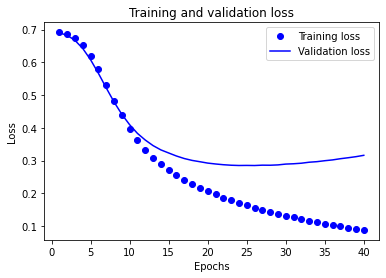

In [84]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

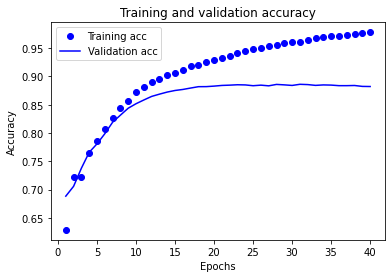

In [85]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [86]:
from numpy import array

# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
# pad documents to a max length of 4 words
max_length = 4
padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')

NameError: name 'encoded_docs' is not defined

In [ ]:
# define the model
model = Sequential()
model.add(keras.layers.Embedding(vocab_size, 4, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
first = keras.models.Model(inputs = model.input, outputs = model.layers[0].output)

In [ ]:
print(padded_docs)

In [ ]:
first.predict(padded_docs)

In [ ]:
padded_docs[0]